In [4]:
using Distributed, SharedArrays
# addprocs only run one time
addprocs(12)

12-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13

In [5]:
@everywhere include("code/acoustic_solver_parallel.jl");
@everywhere include("code/acoustic_solver.jl");
@everywhere include("code/adjoint_method_ot.jl")
@everywhere include("code/optimization.jl")

using PyPlot, JLD2
@everywhere using MAT, ImageFiltering

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-9

      From worker 13:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 13:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 13:	└ @ Base loading.jl:1011
      From worker 10:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 10:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 10:	└ @ Base loading.jl:1011
      From worker 12:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 12:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 12:	└ @ Base loading.jl:1011
      From worker 4:	┌ Warni

┌ Info: Precompiling ImageFiltering [6a3955dd-da59-5b1f-98d4-e7296123deb5]
└ @ Base loading.jl:1273
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
│ This may mean DataStructures [86

      From worker 10:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 10:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 10:	└ @ Base loading.jl:1011
      From worker 7:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 7:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 7:	└ @ Base loading.jl:1011
      From worker 5:	┌ Warning: Module DataStructures with build ID 10895293253802566 is missing from the cache.
      From worker 5:	│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
      From worker 5:	└ @ Base loading.jl:1011
      From worker 4:	┌ Warning: Mo

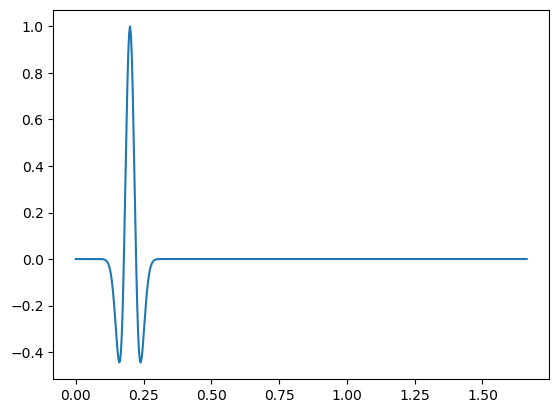

CFL: 0.6
      From worker 6:	CFL: 0.6
      From worker 10:	CFL: 0.6
      From worker 2:	CFL: 0.6
      From worker 12:	CFL: 0.6
      From worker 9:	CFL: 0.6
      From worker 5:	CFL: 0.6
      From worker 8:	CFL: 0.6
      From worker 3:	CFL: 0.6
      From worker 11:	CFL: 0.6
      From worker 4:	CFL: 0.6
      From worker 7:	CFL: 0.6
      From worker 13:	CFL: 0.6


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c082bded0>

In [65]:
@everywhere begin
    Nx = 101
    Ny = 101
    c_true = 3*ones(Nx,Ny)
    for i = 1:Nx
        for j = 1:Ny
            if (i-51)^2+(j-51)^2 < 25^2
                c_true[i,j] = 3.6
            end
        end
    end
    c = 3*ones(Nx,Ny)
    rho = ones(Nx,Ny)
    h = 0.02

    # time
    Fs = 300;
    dt = 1/Fs;
    Nt = 500;
    t = range(0,length=Nt,step=dt);
    println("CFL: ", maximum(c_true) * dt / h);

    # source
    source = source_ricker(10,0.2,t)
    source_num = 11
    source_position = zeros(Int,source_num,2)
    for i = 1:source_num
            source_position[i,:] = [(i-1)*10+1,1]
    end
    source = repeat(source, 1, 1);

    # receiver
    receiver_num = 101
    receiver_position = zeros(Int,receiver_num,2)
    for i = 1:receiver_num
        receiver_position[i,:] = [(i-1)+1,101]
    end

    # PML
    pml_len = 50
    pml_coef = 50;
    
end
plot(t, source[:,1])

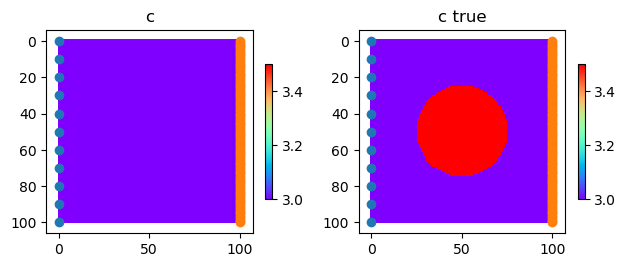

In [66]:
figure
subplot(121); imshow(c, cmap="rainbow"); title("c"); colorbar(shrink=0.3); clim(3,3.5)
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

subplot(122); imshow(c_true, cmap="rainbow"); title("c true"); colorbar(shrink=0.3); clim(3,3.5)
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

tight_layout()

In [67]:
@time uu, received_data = multi_solver(c_true, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position; pml_len=pml_len, pml_coef=pml_coef);
@time data = multi_solver_no_wavefield(c, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position; pml_len=pml_len, pml_coef=pml_coef);

  1.589587 seconds (5.33 k allocations: 285.797 KiB)
  1.315840 seconds (3.85 k allocations: 217.625 KiB)


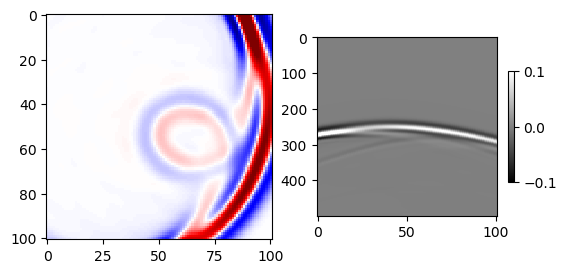

In [68]:
subplot(121)
wv = uu[:,:,250,4]
imshow(wv, cmap="seismic"); clim(-1e-1,1e-1)

subplot(122)
imshow(received_data[:,:,4], cmap="gray", aspect=0.2); colorbar(shrink=0.3);
clim([-1e-1,1e-1]);

In [69]:
M = cost_matrix_1d(t,t)
reg = 1e-4
reg_m = 1e0
iterMax = 100
k = 10
# source ind
ind = 6

adj_l2 = data[:,:,ind] - received_data[:,:,ind];
dd, adj_ot = adj_source_ot_exp(data[:,:,ind], received_data[:,:,ind], M; reg=reg, reg_m=reg_m, iterMax=iterMax, k=k);

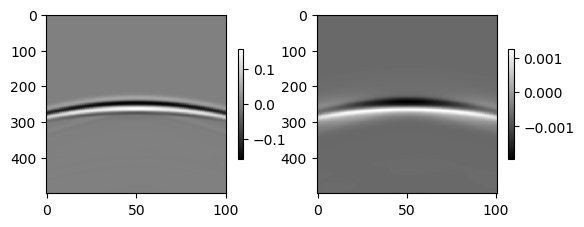

In [70]:

subplot(121)
imshow(adj_l2, cmap="gray", aspect=0.2); colorbar(shrink=0.3);
subplot(122)
imshow(adj_ot, cmap="gray", aspect=0.2); colorbar(shrink=0.3);

In [48]:
# # min_value = minimum(c_true)
# # max_value = maximum(c_true)
# min_value = 0
# max_value = 10
# alpha = 1e-4
# iterNum = 5
# rho = 0.1
# cc = 1e-10
# maxSearchTime = 3
# x0 = reshape(c, Nx*Ny, 1);

In [71]:
eval_fn(x) = obj_func_l2(received_data, x, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position; pml_len=pml_len, pml_coef=pml_coef);

eval_grad(x) = grad_l2(received_data, x, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position; pml_len=pml_len, pml_coef=pml_coef);

eval_fn_ot(x) = obj_func_ot(received_data, x, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position, reg, reg_m, iterMax, k; pml_len=pml_len, pml_coef=pml_coef)

eval_grad_ot(x) = grad_ot(received_data, x, rho, Nx, h, Ny, h, Nt, dt, source, source_position, receiver_position, reg, reg_m, iterMax, k; pml_len=pml_len, pml_coef=pml_coef)

eval_grad_ot (generic function with 1 method)

In [72]:
@time dd, gg_ot = eval_grad_ot(c);
@time dd, gg_l2 = eval_grad(c);

  7.467172 seconds (220.35 k allocations: 13.092 MiB)
  3.761377 seconds (207.52 k allocations: 10.470 MiB, 0.87% gc time)


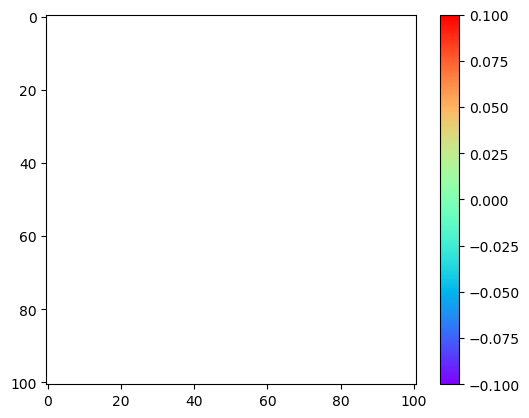

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8c3465ff90>

In [73]:
imshow(alpha*reshape(gg_ot,Nx,Ny), cmap="rainbow"); colorbar()

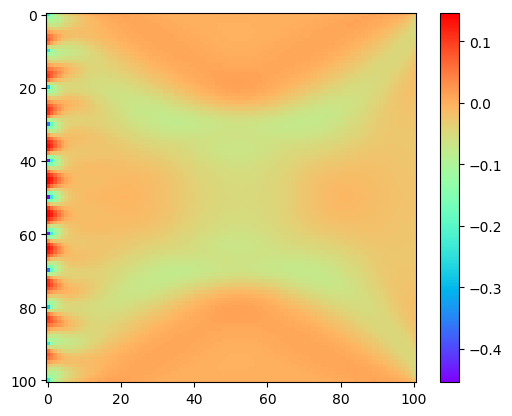

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8c34569dd0>

In [74]:
imshow(alpha*reshape(gg_l2,Nx,Ny), cmap="rainbow"); colorbar()

In [75]:
# min_value = minimum(c_true)
# max_value = maximum(c_true)
min_value = 0
max_value = 10
alpha = 1e-4
iterNum = 5
cc = 1e-10
maxSearchTime = 3
x0 = copy(c)
x0 = reshape(x0, Nx*Ny, 1);

# xk, fn = nonlinear_cg(eval_fn, eval_grad, x0, alpha, iterNum, min_value, max_value; rho=rho, c=cc, maxSearchTime=maxSearchTime, threshold=1e-10);
xk_l2, fn = LBFGS(eval_fn, eval_grad, x0, alpha, iterNum, min_value, max_value; m=3, alpha_search=1, rho=0.1, c=1e-10, maxSearchTime=3, threshold=1e-10)

Main iteration: 1
Start line search. fk: 1.28425e+02
    alpha: 1.00000e-04    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-05    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-06    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-07    fk1: NaN    fk-c*alpha*gradk^2: NaN
Line search succeed. Search time: 3.
----------------------------------------------------------------
Start LBFGS.
----------------------------------------------------------------
Main iteration: 2
Start line search. fk: NaN
    alpha: 1.00000e+00    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-01    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-02    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.00000e-03    fk1: NaN    fk-c*alpha*gradk^2: NaN
Line search succeed. Search time: 3.
----------------------------------------------------------------
Main iteration: 3
Start line search. fk: NaN
    alpha: 1.00000e+00    fk1: NaN    fk-c*alpha*gradk^2: NaN
    alpha: 1.0000

([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [128.42510212666392, NaN, NaN, NaN, NaN, NaN])

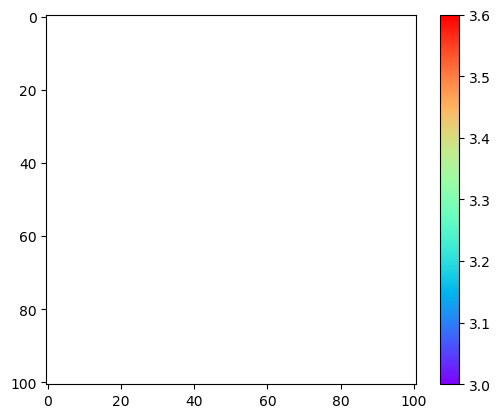

In [58]:
imshow(reshape(xk_l2,Nx,Ny), cmap="rainbow"); colorbar(); clim(3,3.6)

In [20]:
# min_value = minimum(c_true)
# max_value = maximum(c_true)
min_value = 0
max_value = 10
alpha = 5e-3
iterNum = 10
rho = 0.1
cc = 1e-10
maxSearchTime = 5
x0 = reshape(c, Nx*Ny, 1);

# xk, fn = nonlinear_cg(eval_fn_ot, eval_grad_ot, x0, alpha, iterNum, min_value, max_value; rho=rho, c=cc, maxSearchTime=maxSearchTime, threshold=1e-10);
xk_ot, fn = LBFGS(eval_fn_ot, eval_grad_ot, x0, alpha, iterNum, min_value, max_value; m=5, alpha_search=1, rho=0.1, c=1e-10, maxSearchTime=5, threshold=1e-10)

Main iteration: 1
Start line search. fk: 3.31948e+02
    alpha: 1.00000e-02    fk1: 2.65029e+02    fk-c*alpha*gradk^2: 3.31948e+02
Line search succeed. Search time: 0.
----------------------------------------------------------------
Start LBFGS.
----------------------------------------------------------------
Main iteration: 2
Start line search. fk: 2.65029e+02
    alpha: 1.00000e+00    fk1: 1.70022e+02    fk-c*alpha*gradk^2: 2.65029e+02
Line search succeed. Search time: 0.
----------------------------------------------------------------
Main iteration: 3
Start line search. fk: 1.70022e+02
    alpha: 1.00000e+00    fk1: 1.73746e+02    fk-c*alpha*gradk^2: 1.70022e+02
    alpha: 1.00000e-01    fk1: 1.69987e+02    fk-c*alpha*gradk^2: 1.70022e+02
Line search succeed. Search time: 1.
----------------------------------------------------------------
Main iteration: 4
Start line search. fk: 1.69987e+02
    alpha: 1.00000e+00    fk1: 1.68282e+02    fk-c*alpha*gradk^2: 1.69987e+02
Line search su

([3.2267250084853374, 3.1413120638473315, 3.115078097769717, 3.124080296890296, 3.136348625799363, 3.1167760515171534, 3.0580661194186702, 3.0102005836971597, 3.046881498961417, 3.144918604913738  …  3.1369606466582867, 3.1327050625266657, 3.1300374727562374, 3.128636294097094, 3.1293416582304467, 3.133068163617437, 3.1388778407357836, 3.1441339832134236, 3.144822411888731, 3.133073844843977], [331.948225078801, 265.02917201801773, 170.02226063591172, 169.986607229227, 168.28240799305456, 166.91477708800565, 165.78525537305458, 165.7504424889138, 164.28211648570593, 0.0, 0.0])

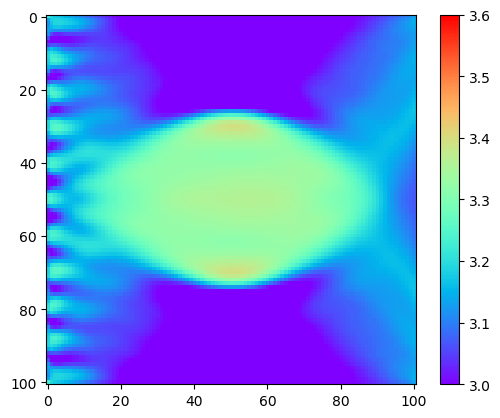

In [21]:
imshow(reshape(xk_ot,Nx,Ny), cmap="rainbow"); colorbar(); clim(3,3.6)

In [108]:
@save "result_ex3.jld2" xk_l2 xk_ot c c_true Nx Ny h t reg reg_m iterMax k adj_l2 adj_ot